### 특성 (Feature)공학과 규제(Regularization : 정형화, 규제, 일반화)

특성공학은 과소적합일 떄 제일 쓰기 좋다

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Data/fish.csv")
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


> 길이, 높이, 두께로 구성된 Data

In [3]:
# Numpy로 변환
fish_full = df.to_numpy()
fish_full[0:6]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32]])

In [4]:
df = pd.read_csv("../Data/fish_weight.csv")
df.head()

,weight
0,5.9
1,32.0
2,40.0
3,51.5
4,70.0


In [5]:
fish_weight = df.to_numpy()
fish_weight[0:6]


array([[  5.9],
       [ 32. ],
       [ 40. ],
       [ 51.5],
       [ 70. ],
       [100. ]])

In [6]:
# Train과 Test로 분리
from sklearn.model_selection import train_test_split

In [7]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_full, fish_weight, random_state=42
)

In [8]:
# 다중회귀 분석
from sklearn.preprocessing import PolynomialFeatures

---
### 다항 특성 만들기 연습

In [9]:
poly = PolynomialFeatures()

In [10]:
poly.fit( [[2,3]] )

PolynomialFeatures()

In [11]:
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


> 1: 절편, 2:X,, 3:Y, 4: 2^2, 6:X*Y, 9:Y^2  
절편이 발생하는 경우 Y=aX+b --> Y=aX+b1의 구조  
[a, b] * [x, 1]

In [12]:
# 절편이 필요 없는 경우

poly = PolynomialFeatures(include_bias=False)

poly.fit([[2,3,4]])
poly.transform([[2,3,4]])

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

---
# 다항 특성 만들기

In [13]:
# train_input으로 다항 특성 만들기
poly = PolynomialFeatures(include_bias=False) # degree = 2 <- default
poly.fit(train_input)
train_poly = poly.transform(train_input)

In [14]:
train_input.shape

(42, 3)

In [15]:
train_poly.shape

(42, 9)

> 컬럼수가 원래 3개였는데 9개로 확장되었다.

In [16]:
# 컬럼 정보 확인
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [17]:
# test_input으로 다항 특성 만들기
test_poly = poly.transform(test_input)

---
### 다중 회귀 모델 훈련하기

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,train_target)
print('train score :',lr.score(train_poly,train_target))
print('test score :',lr.score(test_poly,test_target))

train score : 0.9903183436982125
test score : 0.9714559911594155


---
### 더 많은 특성 만들기

In [20]:
poly = PolynomialFeatures(degree=5, include_bias=False)
train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

In [21]:
print(train_poly.shape,test_poly.shape)

(42, 55) (14, 55)


In [24]:
# 컬럼 정보 확인
poly.get_feature_names()


['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [25]:
# 모델 확인하기
lr.fit(train_poly,train_target)
print("train score :",lr.score(train_poly,train_target))
print("test score :",lr.score(test_poly,test_target))


train score : 0.9999999999938143
test score : -144.40744533753661


> train의 경우는 거의 완벽하였지만 test는 엉망이다.  
> 과대적합이 발생 하였다.  
> 이런 경우 사용하는 것이 규제 이다. 

---
### 규제(Regularization : 정형화, 규제, 일반화)
모델이 과적합되게 학습하지 않고 일반성을 가질 수 있도록 규제(정규화) 하는 것

### 규제 전에 표준화 
: 표준점수(Z점수)를 sklearn을 사용

In [30]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_scaled = ss.fit_transform(train_poly)
test_scaled = ss.transform(test_poly)


### Ridge규제(L2규제)
: 가중치의 제곱으로 규제하는 방법이다.

In [46]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(train_scaled, train_target)
print("train score:", ridge.score(train_scaled,train_target))
print("test score:", ridge.score(test_scaled,test_target))


train score: 0.9896101671037343
test score: 0.9790693977615386


In [49]:
# 적절한 규제 강도(Hyper Parameter) 찾기
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100] # 임의로 정한다.
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)

    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))



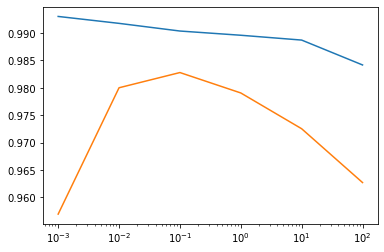

In [56]:
# 시각화 해보기

import matplotlib.pyplot as plt

plt.plot(
    alpha_list,
    train_score

)

plt.plot(
    alpha_list,
    test_score

)

plt.xscale("log")
plt.show()

> x축의 데이터 범위가 너무 커서 소수인 경우에는 확인 할 수 없음  
log 를 사용해 데이터 범위의 축소 및 규칙화

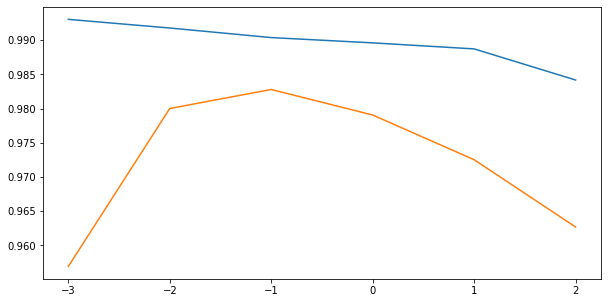

In [58]:
# 시각화 하기
import numpy as np


plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)

> alpha가 -1인 경우가 train과 test의 간격이 제일 가깝다(골디락스(Goldilocks) 지점)  
> 시각화 상의 -1은 우리가 정의한 0.1이다.

In [59]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print("train score:", ridge.score(train_scaled,train_target))
print("test score:", ridge.score(test_scaled,test_target))

train score: 0.9903815817570368
test score: 0.9827976465386896


---
## Lasso(L1규제)
Lasso 규제는 가중치의 절대값으로 규제하는 방법

In [64]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print("train score:", lasso.score(train_scaled, train_target))
print("test score:", lasso.score(test_scaled, test_target))

train score: 0.989789897208096
test score: 0.9800593698421886


In [71]:
# 적절한 규제 강도(Hyper Parameter) 찾기
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10] # 임의로 정한다.
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled,train_target)

    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))



/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.07596994002, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097474788, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926334916, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


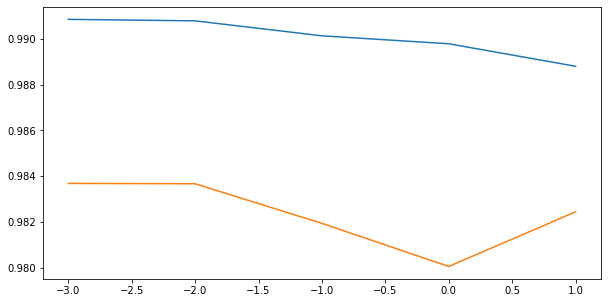

In [72]:
# 시각화 하기

plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)

plt.show()

In [75]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print("train score:", lasso.score(train_scaled, train_target))
print("test score:", lasso.score(test_scaled, test_target))

train score: 0.9888067471131866
test score: 0.9824470598706695


In [78]:
# 라쏘는 절대값을 써서 가중치가 0인 경우가 많이 발쌩

np.sum(lasso.coef_ == 0)

# 컬럼이 55개 인데 40개가 걍 죽어버림 그래서 L2를 많이 씀 딥러닝에서도 

40

In [77]:
np.sum(ridge.coef_ == 0)

0

In [79]:
print(ridge.coef_, ridge.intercept_)

[[ 27.61933479  -1.64022156 -19.73256036  30.03061951  16.99800255
   17.83247301   4.46928273   3.87258547  22.8351822   19.50417483
   17.75985317  14.53122144  13.34875736   7.57294011  19.2573194
    5.12766348  -2.05671393  10.62376405  41.72322888   5.90722851
   14.93389276  -0.4506018   19.86035413   1.27084276  -1.00708878
   19.69043816  -1.15817017  -3.57357468  11.96629206  13.68484378
   -8.41738209  -9.97919956   8.42421045  45.51544903  -6.23828569
   13.36080282 -17.64759601  28.23566212  -6.56619234 -25.89115813
   37.3785331   -0.39779345 -20.82275921 -23.80607786  39.96650626
    0.10569722 -20.49768851 -21.74712923  -4.12579289  35.39224119
   -5.59195    -25.3889504  -23.93962265  -1.89229971  39.44235556]] [400.83333333]


In [80]:
print(lasso.coef_,lasso.intercept_)

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ] [400.83333333]
